## Notebook for plots ex 1 - Strong MPI scalability

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Import the data 

In [3]:
# -----------------STATIC----------------------------------------
path_THIN_static = 'static/THIN_static_.csv'
THIN_static = pd.read_csv(path_THIN_static)

# -----------------ORDERED----------------------------------------
path_THIN_ordered= 'ordered/THIN_ordered_.csv'
THIN_ordered = pd.read_csv(path_THIN_ordered)


## Manipulate the data

In [4]:
# extract the first row for the x axis

n_threads = THIN_static['mpi_task']
n_threads = sorted(n_threads.unique())


In [5]:
# MPI 1

THIN_static_1_means = THIN_static.groupby(['ksize', 'mpi_task']).mean().to_numpy()[:,0]
THIN_static_1_std = THIN_static.groupby(['ksize', 'mpi_task']).std().to_numpy()[:,0]

#--------------ORDERED---------------

# MPI 1

THIN_ord_1_means = THIN_ordered.groupby(['ksize', 'mpi_task']).mean().to_numpy()[:,0]
THIN_ord_1_std = THIN_ordered.groupby(['ksize', 'mpi_task']).std().to_numpy()[:,0]


In [6]:

THIN_static_1_means_ksize_100 = THIN_static_1_means[0:8].reshape(8)
THIN_static_1_means_ksize_500 = THIN_static_1_means[8:16].reshape(8)
THIN_static_1_means_ksize_1000 = THIN_static_1_means[16:24].reshape(8)
THIN_static_1_means_ksize_5000 = THIN_static_1_means[24:32].reshape(8)
THIN_static_1_means_ksize_10000 = THIN_static_1_means[32:40].reshape(8)

THIN_static_1_std_ksize_100 = THIN_static_1_std[0:8].reshape(8)
THIN_static_1_std_ksize_500 = THIN_static_1_std[8:16].reshape(8)
THIN_static_1_std_ksize_1000 = THIN_static_1_std[16:24].reshape(8)
THIN_static_1_std_ksize_5000 = THIN_static_1_std[24:32].reshape(8)
THIN_static_1_std_ksize_10000 = THIN_static_1_std[32:40].reshape(8)

#--------------ORDERED---------------

THIN_ord_1_means_ksize_100 = THIN_ord_1_means[0:7].reshape(7)
THIN_ord_1_means_ksize_500 = THIN_ord_1_means[7:14].reshape(7)
THIN_ord_1_means_ksize_1000 = THIN_ord_1_means[14:21].reshape(7)
THIN_ord_1_means_ksize_5000 = THIN_ord_1_means[21:28].reshape(7)
THIN_ord_1_means_ksize_10000 = THIN_ord_1_means[28:35].reshape(7)

THIN_ord_1_std_ksize_100 = THIN_ord_1_std[0:7].reshape(7)
THIN_ord_1_std_ksize_500 = THIN_ord_1_std[7:14].reshape(7)
THIN_ord_1_std_ksize_1000 = THIN_ord_1_std[14:21].reshape(7)
THIN_ord_1_std_ksize_5000 = THIN_ord_1_std[21:28].reshape(7)
THIN_ord_1_std_ksize_10000 = THIN_ord_1_std[28:35].reshape(7)



## Plot

### 1 MPI - static



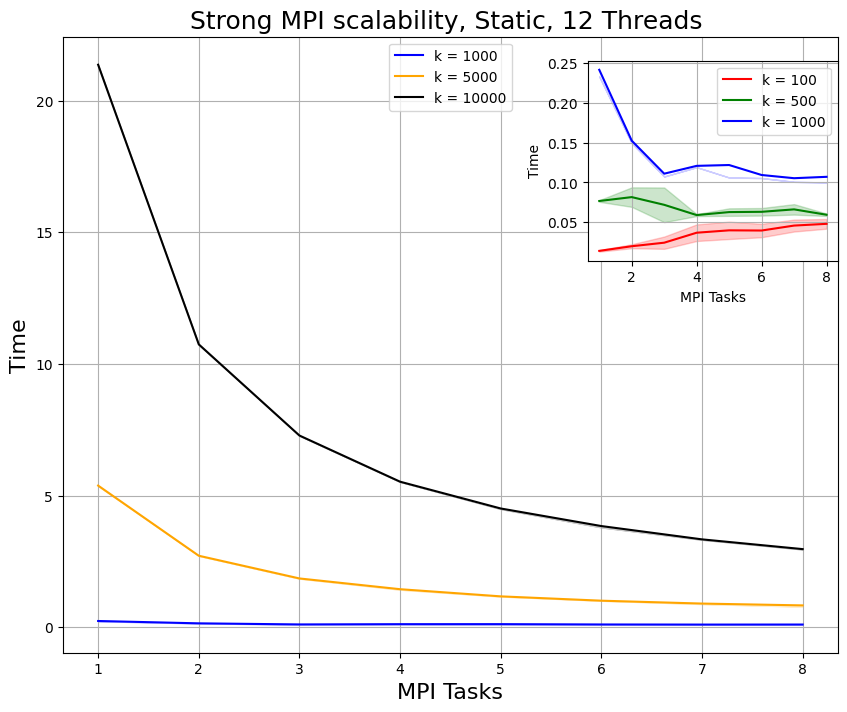

In [7]:

fig = plt.figure(figsize=(10, 8))  # Set figure size (width=10, height=8)
ax = fig.add_subplot(111)  # Create the main plot in the entire figure

ax.plot(n_threads, THIN_static_1_means_ksize_1000, label = 'k = 1000', color = 'blue')
ax.plot(n_threads, THIN_static_1_means_ksize_5000, label = 'k = 5000', color = 'orange')
ax.plot(n_threads, THIN_static_1_means_ksize_10000, label = 'k = 10000', color = 'black')


ax.fill_between(n_threads, THIN_static_1_means_ksize_1000 - THIN_static_1_std_ksize_1000, THIN_static_1_means_ksize_1000 - THIN_static_1_std_ksize_1000, alpha=0.2, color = 'blue')
ax.fill_between(n_threads, THIN_static_1_means_ksize_5000 - THIN_static_1_std_ksize_5000, THIN_static_1_means_ksize_5000 - THIN_static_1_std_ksize_5000, alpha=0.2, color = 'orange')
ax.fill_between(n_threads, THIN_static_1_means_ksize_10000 - THIN_static_1_std_ksize_10000, THIN_static_1_means_ksize_10000 - THIN_static_1_std_ksize_10000, alpha=0.2, color = 'black')

ax.set_xlabel('MPI Tasks', fontsize = 16)
ax.set_ylabel('Time', fontsize = 16)
ax.set_title('Strong MPI scalability, Static, 12 Threads ', fontsize = 18)

ax.legend(loc='upper center')

ax.grid()

# Define the inset plot location and size
# The arguments to 'inset_axes' are [left, bottom, width, height] as a fraction of the main plot
inset_ax = fig.add_axes([0.65, 0.6, 0.25, 0.25])  # Positioning inset at upper-right corner

# Create the inset plot
inset_ax.plot(n_threads, THIN_static_1_means_ksize_100, label = 'k = 100', color = 'red')
inset_ax.plot(n_threads, THIN_static_1_means_ksize_500, label = 'k = 500', color = 'green')
inset_ax.plot(n_threads, THIN_static_1_means_ksize_1000, label = 'k = 1000', color = 'blue')

inset_ax.fill_between(n_threads, THIN_static_1_means_ksize_100 - THIN_static_1_std_ksize_100, THIN_static_1_means_ksize_100 + THIN_static_1_std_ksize_100, alpha=0.2,  color = 'red')
inset_ax.fill_between(n_threads, THIN_static_1_means_ksize_500 - THIN_static_1_std_ksize_500,  THIN_static_1_means_ksize_500 + THIN_static_1_std_ksize_500, alpha=0.2, color = 'green')
inset_ax.fill_between(n_threads, THIN_static_1_means_ksize_1000 - THIN_static_1_std_ksize_1000, THIN_static_1_means_ksize_1000 - THIN_static_1_std_ksize_1000, alpha=0.2, color = 'blue')


inset_ax.set_ylabel('Time')
inset_ax.set_xlabel('MPI Tasks')


inset_ax.legend(fontsize=10)
inset_ax.grid()

# Show the plot with the inset

plt.show()

### 1 MPI - ordered


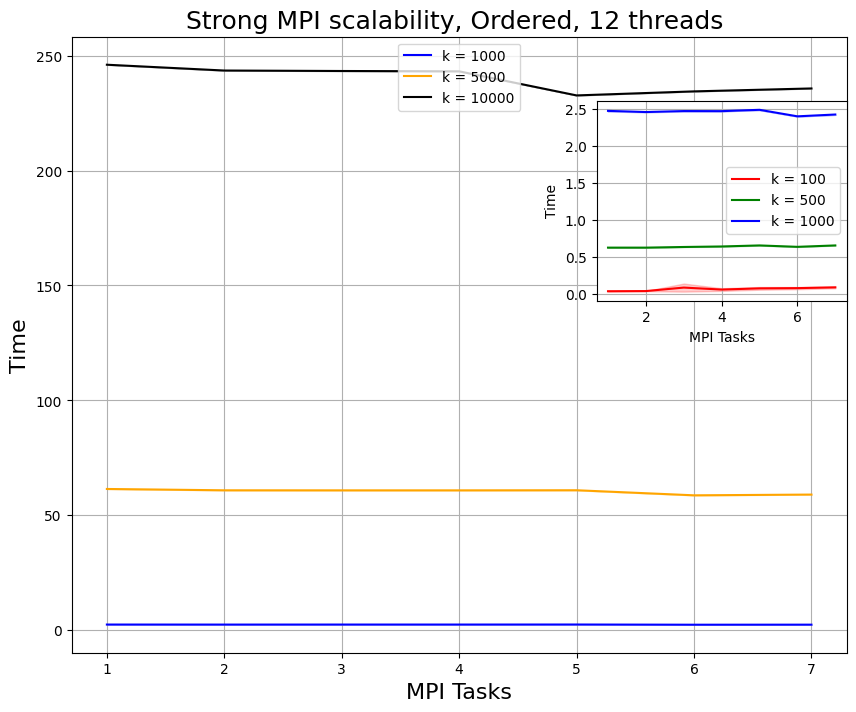

In [8]:
n_threads_ord = n_threads[:7]


fig = plt.figure(figsize=(10, 8))  # Set figure size (width=10, height=8)
ax = fig.add_subplot(111)  # Create the main plot in the entire figure

ax.plot(n_threads_ord, THIN_ord_1_means_ksize_1000, label = 'k = 1000', color = 'blue')
ax.plot(n_threads_ord, THIN_ord_1_means_ksize_5000, label = 'k = 5000', color = 'orange')
ax.plot(n_threads_ord, THIN_ord_1_means_ksize_10000, label = 'k = 10000', color = 'black')


ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_1000 - THIN_ord_1_std_ksize_1000, THIN_ord_1_means_ksize_1000 - THIN_ord_1_std_ksize_1000, alpha=0.2, color = 'blue')
ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_5000 - THIN_ord_1_std_ksize_5000, THIN_ord_1_means_ksize_5000 - THIN_ord_1_std_ksize_5000, alpha=0.2, color = 'orange')
ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_10000 - THIN_ord_1_std_ksize_10000, THIN_ord_1_means_ksize_10000 - THIN_ord_1_std_ksize_10000, alpha=0.2, color = 'black')

ax.set_xlabel('MPI Tasks', fontsize = 16)
ax.set_ylabel('Time', fontsize = 16)
ax.set_title('Strong MPI scalability, Ordered, 12 threads ', fontsize = 18)

ax.legend(loc='upper center')

ax.grid()

# Define the inset plot location and size
# The arguments to 'inset_axes' are [left, bottom, width, height] as a fraction of the main plot
inset_ax = fig.add_axes([0.65, 0.55, 0.25, 0.25])  # Positioning inset at upper-right corner

# Create the inset plot
inset_ax.plot(n_threads_ord, THIN_ord_1_means_ksize_100, label = 'k = 100', color = 'red')
inset_ax.plot(n_threads_ord, THIN_ord_1_means_ksize_500, label = 'k = 500', color = 'green')
inset_ax.plot(n_threads_ord, THIN_ord_1_means_ksize_1000, label = 'k = 1000', color = 'blue')

inset_ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_100 - THIN_ord_1_std_ksize_100, THIN_ord_1_means_ksize_100 + THIN_ord_1_std_ksize_100, alpha=0.2,  color = 'red')
inset_ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_500 - THIN_ord_1_std_ksize_500,  THIN_ord_1_means_ksize_500 + THIN_ord_1_std_ksize_500, alpha=0.2, color = 'green')
inset_ax.fill_between(n_threads_ord, THIN_ord_1_means_ksize_1000 - THIN_ord_1_std_ksize_1000, THIN_ord_1_means_ksize_1000 - THIN_ord_1_std_ksize_1000, alpha=0.2, color = 'blue')


inset_ax.set_ylabel('Time')
inset_ax.set_xlabel('MPI Tasks')


inset_ax.legend(fontsize=10)
inset_ax.grid()

# Show the plot with the inset

plt.show()

In [9]:
# speedup

#static

speed_stat_1_k_100 = THIN_static_1_means_ksize_100[0]/THIN_static_1_means_ksize_100
speed_stat_1_k_500 = THIN_static_1_means_ksize_500[0]/THIN_static_1_means_ksize_500
speed_stat_1_k_1000 = THIN_static_1_means_ksize_1000[0]/THIN_static_1_means_ksize_1000
speed_stat_1_k_5000 = THIN_static_1_means_ksize_5000[0]/THIN_static_1_means_ksize_5000
speed_stat_1_k_10000 = THIN_static_1_means_ksize_10000[0]/THIN_static_1_means_ksize_10000


#ordered

speed_ord_1_k_100 = THIN_ord_1_means_ksize_100[0]/THIN_ord_1_means_ksize_100
speed_ord_1_k_500 = THIN_ord_1_means_ksize_500[0]/THIN_ord_1_means_ksize_500
speed_ord_1_k_1000 = THIN_ord_1_means_ksize_1000[0]/THIN_ord_1_means_ksize_1000
speed_ord_1_k_5000 = THIN_ord_1_means_ksize_5000[0]/THIN_ord_1_means_ksize_5000
speed_ord_1_k_10000 = THIN_ord_1_means_ksize_10000[0]/THIN_ord_1_means_ksize_10000


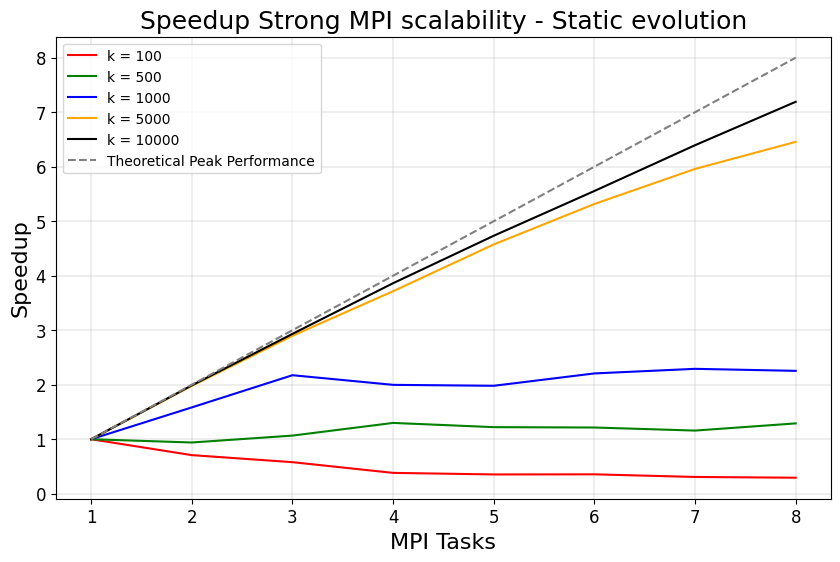

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, speed_stat_1_k_100, label = 'k = 100', color = 'red')
plt.plot(n_threads, speed_stat_1_k_500, label = 'k = 500', color = 'green')
plt.plot(n_threads, speed_stat_1_k_1000, label = 'k = 1000', color = 'blue')
plt.plot(n_threads, speed_stat_1_k_5000, label = 'k = 5000', color = 'orange')
plt.plot(n_threads, speed_stat_1_k_10000, label = 'k = 10000', color = 'black')

x_values = np.arange(1, 9, 1)
plt.plot(x_values, x_values, c = "gray", linestyle="dashed", label="Theoretical Peak Performance")


plt.xlabel('MPI Tasks', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Speedup Strong MPI scalability - Static evolution', fontsize = 18)

plt.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



plt.grid(linewidth = 0.3)
plt.show()

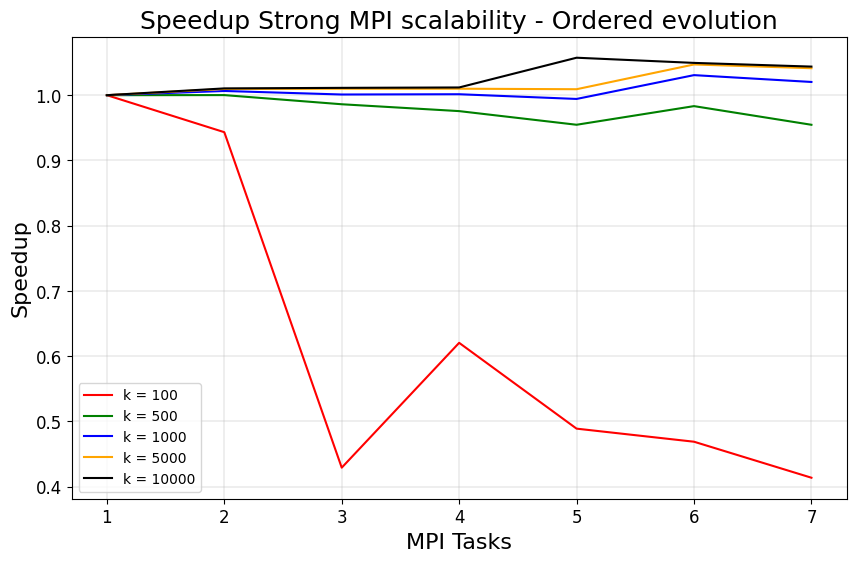

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads_ord, speed_ord_1_k_100, label = 'k = 100', color = 'red')
plt.plot(n_threads_ord, speed_ord_1_k_500, label = 'k = 500', color = 'green')
plt.plot(n_threads_ord, speed_ord_1_k_1000, label = 'k = 1000', color = 'blue')
plt.plot(n_threads_ord, speed_ord_1_k_5000, label = 'k = 5000', color = 'orange')
plt.plot(n_threads_ord, speed_ord_1_k_10000, label = 'k = 10000', color = 'black')


plt.xlabel('MPI Tasks', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Speedup Strong MPI scalability - Ordered evolution', fontsize = 18)

plt.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



plt.grid(linewidth = 0.3)
plt.show()